## A description of the problem and a discussion of the background

In an effort to reduce the frequency of car collisions in a community, an algorithim will be developed to analysis the distribution of the accident and the factors that affected the accident. 
In this project, I would like to analyze how the weather, road condition, light condition and the type of the collision impact the severity of colliision. By comparing different modle with different accuracy, I would like to find the best modle to predict the severity of collision and alert the driver and give them suggestions if they are under some circumsatance of colliision risk. 

## A description of the data and how it will be used to solve the problem

The data will be used is the severity of car accidents in Seattle. The data contains serverity code information, and collision type, weather, road condition and light condition, ect. 

First the data need to be analyzed and visulaized and cleaned.  The data contains "NAN", this need to be standardlized and replaced to be 0.
The second step will be change the collision type, weather, road condition and light condition column, from object type to category type, then change it to code. In this way, the data could be used for modeliing. 
The third step is to normalize the data. 
The forth stepp is to seperate data into train data and test data. Then use differnt classifications, K nearest neighbor (KNN)and decision tree to analyze the modle and the accuray. With KNN, I will try differnt K values. 
In the end, by compearing differnt modles to find the best accurancy. This model will be used to solve the problem. 


In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## Load data

In [3]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

## Data Visulization and Analysis

In [5]:
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


In [6]:
df['LOCATION'].value_counts().to_frame()

,LOCATION
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,254
6TH AVE AND JAMES ST,252
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,239
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP,238
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,231
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,212
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP,212


In [7]:
df['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [8]:
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


In [9]:
df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In [10]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [11]:
df['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [12]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

## Lable Encoding

In [13]:
df['WEATHER']


0         Overcast
1          Raining
2         Overcast
3            Clear
4          Raining
5            Clear
6          Raining
7            Clear
8            Clear
9            Clear
10        Overcast
11           Clear
12         Raining
13         Raining
14           Clear
15             NaN
16        Overcast
17        Overcast
18           Clear
19         Unknown
20           Clear
21           Clear
22           Clear
23         Unknown
24           Clear
25           Clear
26        Overcast
27           Clear
28           Clear
29           Clear
            ...   
194643       Clear
194644       Clear
194645       Clear
194646         NaN
194647     Raining
194648     Raining
194649       Clear
194650       Clear
194651       Clear
194652    Overcast
194653    Overcast
194654         NaN
194655         NaN
194656       Clear
194657     Raining
194658     Raining
194659     Raining
194660     Raining
194661       Clear
194662       Clear
194663     Raining
194664      

In [16]:
X = df[['LOCATION','SEVERITYDESC', 'COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].values

In [18]:
X[0:5]

array([['5TH AVE NE AND NE 103RD ST', 'Injury Collision', 'Angles',
        'Overcast', 'Wet', 'Daylight'],
       ['AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N',
        'Property Damage Only Collision', 'Sideswipe', 'Raining', 'Wet',
        'Dark - Street Lights On'],
       ['4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST',
        'Property Damage Only Collision', 'Parked Car', 'Overcast',
        'Dry', 'Daylight'],
       ['2ND AVE BETWEEN MARION ST AND MADISON ST',
        'Property Damage Only Collision', 'Other', 'Clear', 'Dry',
        'Daylight'],
       ['SWIFT AVE S AND SWIFT AV OFF RP', 'Injury Collision', 'Angles',
        'Raining', 'Wet', 'Daylight']], dtype=object)

In [19]:
y = df['SEVERITYCODE'].values

In [20]:
y[0:5]

array([2, 1, 1, 1, 2])

## Normalize data


### Clean and fill in the Null data

In [64]:
df.replace(np.nan,0)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,WEATHER_cat,weather_cat,ROADCOND_cat,LIGHTCOND_cat,COLLISIONTYPE_cat
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,10,Entering at angle,0,0,N,4,4,8,5,0
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,0.0,...,11,From same direction - both going straight - bo...,0,0,N,6,6,8,2,9
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,0.0,...,32,One parked--one moving,0,0,N,4,4,0,5,5
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,0.0,...,23,From same direction - all others,0,0,N,1,1,0,5,4
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,10,Entering at angle,0,0,N,6,6,8,5,0
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,10,Entering at angle,0,0,N,1,1,0,5,0
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,10,Entering at angle,0,0,N,6,6,8,5,0
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,5,Vehicle Strikes Pedalcyclist,6855,0,N,1,1,0,5,1
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,0.0,...,32,One parked--one moving,0,0,N,1,1,0,5,5
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,10,Entering at angle,0,0,N,1,1,0,5,0


## Change the weather colomn from category to number category

In [65]:
df["WEATHER"] = df["WEATHER"].astype('category')
df.dtypes

SEVERITYCODE            int64
X                     float64
Y                     float64
OBJECTID                int64
INCKEY                  int64
COLDETKEY               int64
REPORTNO               object
STATUS                 object
ADDRTYPE               object
INTKEY                float64
LOCATION               object
EXCEPTRSNCODE          object
EXCEPTRSNDESC          object
SEVERITYCODE.1          int64
SEVERITYDESC           object
COLLISIONTYPE        category
PERSONCOUNT             int64
PEDCOUNT                int64
PEDCYLCOUNT             int64
VEHCOUNT                int64
INCDATE                object
INCDTTM                object
JUNCTIONTYPE           object
SDOT_COLCODE            int64
SDOT_COLDESC           object
INATTENTIONIND         object
UNDERINFL              object
WEATHER              category
ROADCOND             category
LIGHTCOND            category
PEDROWNOTGRNT          object
SDOTCOLNUM            float64
SPEEDING               object
ST_COLCODE

In [66]:
df["WEATHER_cat"] = df["WEATHER"].cat.codes

In [67]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,WEATHER_cat,weather_cat,ROADCOND_cat,LIGHTCOND_cat,COLLISIONTYPE_cat
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,10,Entering at angle,0,0,N,4,4,8,5,0
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,11,From same direction - both going straight - bo...,0,0,N,6,6,8,2,9
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,32,One parked--one moving,0,0,N,4,4,0,5,5
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,23,From same direction - all others,0,0,N,1,1,0,5,4
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,10,Entering at angle,0,0,N,6,6,8,5,0


## Change the ROADCOND, LIGHTCOND, COLLISIONTYPE colomn from object to category, and then change to number category

In [68]:
df["ROADCOND"] = df["ROADCOND"].astype('category')
df["LIGHTCOND"] = df["LIGHTCOND"].astype('category')
df["COLLISIONTYPE"] = df["COLLISIONTYPE"].astype('category')
df.dtypes

SEVERITYCODE            int64
X                     float64
Y                     float64
OBJECTID                int64
INCKEY                  int64
COLDETKEY               int64
REPORTNO               object
STATUS                 object
ADDRTYPE               object
INTKEY                float64
LOCATION               object
EXCEPTRSNCODE          object
EXCEPTRSNDESC          object
SEVERITYCODE.1          int64
SEVERITYDESC           object
COLLISIONTYPE        category
PERSONCOUNT             int64
PEDCOUNT                int64
PEDCYLCOUNT             int64
VEHCOUNT                int64
INCDATE                object
INCDTTM                object
JUNCTIONTYPE           object
SDOT_COLCODE            int64
SDOT_COLDESC           object
INATTENTIONIND         object
UNDERINFL              object
WEATHER              category
ROADCOND             category
LIGHTCOND            category
PEDROWNOTGRNT          object
SDOTCOLNUM            float64
SPEEDING               object
ST_COLCODE

In [69]:
df["ROADCOND_cat"] = df["ROADCOND"].cat.codes
df["LIGHTCOND_cat"] = df["LIGHTCOND"].cat.codes
df["COLLISIONTYPE_cat"] = df["COLLISIONTYPE"].cat.codes

In [70]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,WEATHER_cat,weather_cat,ROADCOND_cat,LIGHTCOND_cat,COLLISIONTYPE_cat
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,10,Entering at angle,0,0,N,4,4,8,5,0
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,11,From same direction - both going straight - bo...,0,0,N,6,6,8,2,9
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,32,One parked--one moving,0,0,N,4,4,0,5,5
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,23,From same direction - all others,0,0,N,1,1,0,5,4
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,10,Entering at angle,0,0,N,6,6,8,5,0


In [71]:
df.drop(['weather_cat'],axis=1)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,WEATHER_cat,ROADCOND_cat,LIGHTCOND_cat,COLLISIONTYPE_cat
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,NaN,10,Entering at angle,0,0,N,4,8,5,0
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,NaN,11,From same direction - both going straight - bo...,0,0,N,6,8,2,9
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,NaN,32,One parked--one moving,0,0,N,4,0,5,5
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,NaN,23,From same direction - all others,0,0,N,1,0,5,4
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,NaN,10,Entering at angle,0,0,N,6,8,5,0
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,NaN,10,Entering at angle,0,0,N,1,0,5,0
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,NaN,10,Entering at angle,0,0,N,6,8,5,0
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N,1,0,5,1
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,NaN,32,One parked--one moving,0,0,N,1,0,5,5
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,NaN,10,Entering at angle,0,0,N,1,0,5,0


## Feature set

In [86]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'WEATHER_cat',
       'weather_cat', 'ROADCOND_cat', 'LIGHTCOND_cat', 'COLLISIONTYPE_cat'],
      dtype='object')

In [87]:
X= df[['WEATHER_cat','ROADCOND_cat','LIGHTCOND_cat','COLLISIONTYPE_cat']].values

In [88]:
X[0:5]

array([[4, 8, 5, 0],
       [6, 8, 2, 9],
       [4, 0, 5, 5],
       [1, 0, 5, 4],
       [6, 8, 5, 0]], dtype=int8)

In [89]:
y = df['SEVERITYCODE'].values

In [90]:
y[0:5]

array([2, 1, 1, 1, 2])

## Normalize Data

In [91]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [92]:
X[0:5]

array([[ 0.35364615,  1.50545441,  0.3912104 , -1.51529661],
       [ 1.04520829,  1.50545441, -1.18714134,  1.60875294],
       [ 0.35364615, -0.68713674,  0.3912104 ,  0.22028647],
       [-0.68369706, -0.68713674,  0.3912104 , -0.12683015],
       [ 1.04520829,  1.50545441,  0.3912104 , -1.51529661]])

## Train Test Split

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 4) (155738,)
Test set: (38935, 4) (38935,)


## Classification

### K nearest neighbor (KNN)

### Classifier implementing the k-nearest neighbors vote.

In [94]:
from sklearn.neighbors import KNeighborsClassifier

### Training

In [95]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

### Predicting

In [96]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1])

### Accuracy Evaluation

In [97]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.734579871322349
Test set Accuracy:  0.7368691408758187


### Try K=6

In [98]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.735241238490285
Test set Accuracy:  0.7384358546295107


### Other K

In [100]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.69860023, 0.71252087, 0.71714396, 0.73686914, 0.7261333 ,
       0.73843585, 0.73753692, 0.74113266, 0.74041351])

### Plot modle accurancy with difffernt neighbour numbers

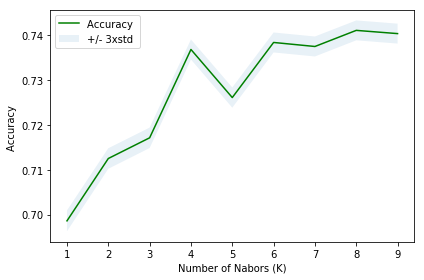

In [101]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [102]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7411326569924233 with k= 8


## Decision Tree model for predicting

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [104]:
X_trainset_DT, X_testset_DT, y_trainset_DT, y_testset_DT = train_test_split(X, y, test_size=0.3, random_state=3)

In [106]:
print ('Train set:', X_trainset_DT.shape,  y_trainset_DT.shape)
print ('Test set:', X_testset_DT.shape,  y_testset_DT.shape)

Train set: (136271, 4) (136271,)
Test set: (58402, 4) (58402,)


In [107]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [108]:
drugTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [110]:
drugTree.fit(X_trainset_DT,y_trainset_DT)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [111]:
predTree = drugTree.predict(X_testset_DT)

In [113]:
print (predTree [0:5])
print (y_testset_DT [0:5])

[1 1 1 1 1]
[1 1 1 2 1]


### Evaluation

In [115]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset_DT, predTree))

DecisionTrees's Accuracy:  0.7469607205232698


### Visulization

In [128]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
import pydotplus

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

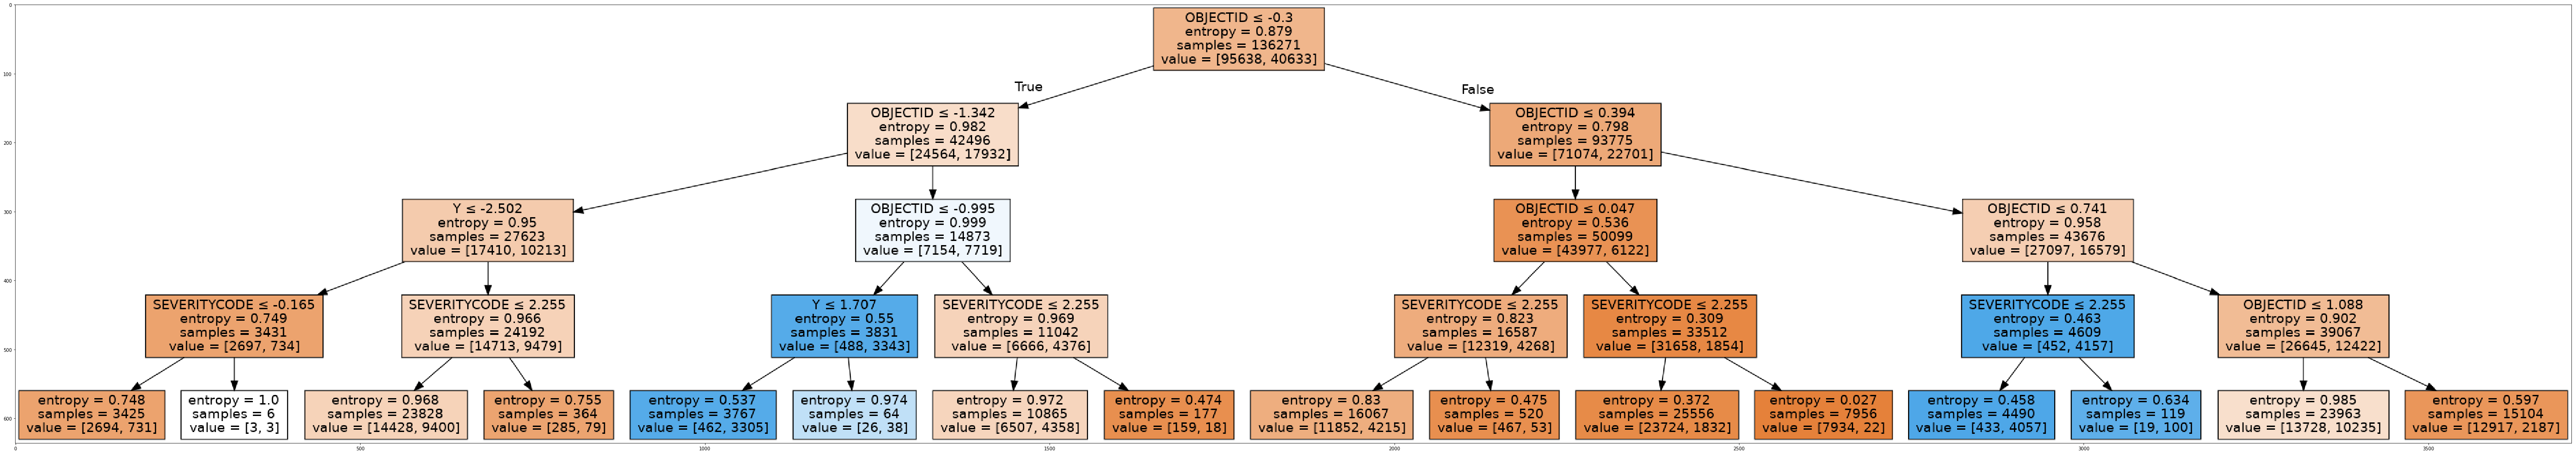

In [132]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:4]
targetNames = df["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Choose the best model with high accuracy

In [133]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset_DT, predTree))

The best accuracy was with 0.7411326569924233 with k= 8
DecisionTrees's Accuracy:  0.7469607205232698


In [137]:
if mean_acc.max()> metrics.accuracy_score(y_testset_DT, predTree):
    print ("KNN model fits better, choose KNN")
else:
    print ("DecisionTrees model fits better, choose DecisionTrees")

DecisionTrees model fits better, choose DecisionTrees


## Conclusion

### After analyzing the data, it shows that collision type, weather, road condition and light condition could impact the severity of collision.  With KNN, the prediction accuracy is 0.7411326569924233 with K=8, but it will be slightly better with accuracy 0.7469607205232698 by using decision tree.   The drive could be altered with certain weather,road condition, light condion and collision type to see if the collision will be sever or not.  